##TITLE: Drugs, Side Effects and Medical Condition

OBJECTIVE :
The primary aim of this project is to conduct a comprehensive exploratory data analysis (EDA) to understand how various pharmaceutical drugs relate to the medical conditions they are intended to treat, along with the side effects reported by users. This analysis also seeks to uncover patterns in patient reviews and ratings, offering insights into drug effectiveness and safety perceptions. Through this process, we aim to reveal meaningful trends that could inform future research, patient decision-making, and healthcare recommendations.

**Dataset Overview**

drug_name: Name of the drug.

● medical_condition: The condition the drug is used to treat.

● side_effects: Common side effects of the drug.

● generic_name: The generic name of the drug.

● drug_classes: The class of the drug (e.g., antibiotic, antihistamine).

● brand_names: Brand names under which the drug is sold.

● activity: The activity of the drug (e.g., active, inactive).

● rx_otc: Indicates if the drug is prescription (Rx) or over-the-counter (OTC).

● pregnancy_category: The drug's pregnancy risk category.

● csa: Controlled Substances Act schedule, if applicable.

● alcohol: Interactions with alcohol.

● related_drugs: Other drugs related to the primary drug.

● medical_condition_description: A brief description of the medical
condition.

● rating: Average user rating of the drug.

● no_of_reviews: Number of user reviews.

● drug_link: URL link to more information about the drug.

● medical_condition_url: URL link to more information about the medical
condition.

In [1]:
#Import Libraries
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# importing the dataset

In [3]:
from google.colab import files
uploaded = files.upload()


Saving drugs_side_effects_drugs_com.csv to drugs_side_effects_drugs_com.csv


In [6]:
import pandas as pd

df = pd.read_csv('drugs_side_effects_drugs_com.csv')
df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


#preprocessing steps

In [7]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [8]:
df.tail()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html
2930,setmelanotide,Weight Loss,hives ; difficult breathing; swelling of your ...,setmelanotide,Melanocortin receptor agonists,Imcivree,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/obesity.html


In [9]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [11]:
df.shape

(2931, 17)

In [12]:
print("Shape:", df.shape)
print("Columns:", df.columns)


Shape: (2931, 17)
Columns: Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')



# Data Cleaning:

Handles missing values (NaN) via both dropna() and fillna('Unknown').

Drops irrelevant columns like 'brand_names'.

Cleans inconsistent formats in fields like 'activity' and 'alcohol'.

In [13]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
brand_names,1213
activity,0
rx_otc,1
pregnancy_category,229
csa,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

Handle missing values:

In [16]:
# Dropping the 'brand_names' column and delete from dataset
df.drop(columns=['brand_names'], inplace=True)

In [17]:
# Find duplicate rows based on all columns
duplicate_rows= df[df.duplicated()]

In [18]:
#Count the duplicated rows
duplicate_count = duplicate_rows.shape[0]

In [19]:
# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count)
print(duplicate_rows)

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [20]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],
errors='coerce')

In [21]:
print(df.dtypes.value_counts())

object     14
float64     2
Name: count, dtype: int64


In [22]:
# Convert 'activity' to string, remove whitespace and '%'character, then convert to float and divide by 100

df['activity'] =df['activity'].astype(str).str.replace(r'\s+', '',
regex=True).str.rstrip('%').astype('float')/100

In [23]:
# Display the updated 'activity' column
print(df['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [24]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [27]:
df['alcohol']=df['alcohol'].replace(np.nan,'0') # Changed np.NaN to np.nan
df['alcohol']=df['alcohol'].replace({'X': 1})
df["side_effects"] = df['side_effects'].fillna('Unknown')
df["related_drugs"] = df['related_drugs'].fillna('Unknown')
df["rating"] = df['rating'].fillna('0')
df["no_of_reviews"] = df['no_of_reviews'].fillna('0')
df['generic_name']=df['generic_name'].replace(np.nan,'Unknown') # Changed np.NaN to np.nan
df['drug_classes']=df['drug_classes'].replace(np.nan,'Unknown') # Changed np.NaN to np.nan
df["rx_otc"].unique()
df["pregnancy_category"].unique()
df['rx_otc']=df['rx_otc'].replace(np.nan, 'Unknown') # Changed np.NaN to np.nan

In [28]:
df['pregnancy_category']=df['pregnancy_category'].replace(np.nan, 'Unknown') # Changed np.NaN to np.nan

df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],errors='coerce')

print(df.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [29]:
df["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

# Feature Encoding:

Uses LabelEncoder effectively on all relevant string-type columns.

In [30]:
columns_to_encode = df.select_dtypes(include='object').columns.tolist()


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store encoders for inverse mapping
label_mappings = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [33]:
label_encoder = LabelEncoder()
df["drug_name"]=label_encoder.fit_transform(df["drug_name"])
df["medical_condition"] =label_encoder.fit_transform(df["medical_condition"])
df["side_effects"] =label_encoder.fit_transform(df["side_effects"])
df["generic_name"] =label_encoder.fit_transform(df["generic_name"])
df["drug_classes"] =label_encoder.fit_transform(df["drug_classes"])
df["activity"]=label_encoder.fit_transform(df["activity"])
df["rx_otc"]=label_encoder.fit_transform(df["rx_otc"])
df["pregnancy_category"] =label_encoder.fit_transform(df["pregnancy_category"])
df["csa"]=label_encoder.fit_transform(df["csa"])
df["alcohol"]=label_encoder.fit_transform(df["alcohol"])
df["related_drugs"]=label_encoder.fit_transform(df["related_drugs"])
df["medical_condition_description"]=label_encoder.fit_transform(df["medical_condition_description"])
df["drug_link"]=label_encoder.fit_transform(df["drug_link"])
df["medical_condition_url"]=label_encoder.fit_transform(df["medical_condition_url"])


In [34]:
data=pd.DataFrame(df,columns=('generic_name','medical_condition', 'no_of_reviews', 'side_effects', 'rating','csa', 'pregnancy_category', 'rx_otc', 'alcohol'))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   generic_name        2931 non-null   int64  
 1   medical_condition   2931 non-null   int64  
 2   no_of_reviews       2931 non-null   float64
 3   side_effects        2931 non-null   int64  
 4   rating              2931 non-null   int64  
 5   csa                 2931 non-null   int64  
 6   pregnancy_category  2931 non-null   int64  
 7   rx_otc              2931 non-null   int64  
 8   alcohol             2931 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 206.2 KB


In [36]:
data.head(5)

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,997,12,760.0,557,51,5,3,1,1
1,303,12,449.0,1082,55,5,2,1,1
2,41,12,482.0,1887,39,5,3,1,0
3,1287,12,623.0,1747,63,5,6,1,1
4,845,12,146.0,292,58,5,1,1,0


# Feature Scaling:

Applies StandardScaler to numerical features for normalization before analysis.

In [37]:
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
print(scaled_data)

[[ 0.71617292 -0.67320971  5.10119829 ...  0.28892455 -0.17025661
   1.06232778]
 [-1.04480661 -0.67320971  2.89586941 ... -0.43301735 -0.17025661
   1.06232778]
 [-1.70961444 -0.67320971  3.12987537 ...  0.28892455 -0.17025661
  -0.94132905]
 ...
 [-1.36452335  1.5139306  -0.28802985 ... -0.43301735 -0.17025661
   1.06232778]
 [-1.07779326  1.5139306  -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]
 [-1.07779326  1.5139306  -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]]


In [38]:
df_std = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
print(df_std)

      generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0         0.716173          -0.673210       5.101198     -1.069561  0.782599   
1        -1.044807          -0.673210       2.895869     -0.410508  0.917915   
2        -1.709614          -0.673210       3.129875      0.600040  0.376653   
3         1.452029          -0.673210       4.129719      0.424293  1.188545   
4         0.330483          -0.673210       0.747269     -1.402226  1.019401   
...            ...                ...            ...           ...       ...   
2926     -0.075507           1.513931      -0.167481     -0.434359  1.053230   
2927      0.959767           1.513931      -0.288030     -0.863685 -0.942672   
2928     -1.364523           1.513931      -0.288030      1.045685 -0.942672   
2929     -1.077793           1.513931      -0.288030      0.883747 -0.942672   
2930     -1.077793           1.513931      -0.288030     -0.780833 -0.942672   

           csa  pregnancy_category    r

# Visual Analysis:

Correlation heatmap

Top 10 medical conditions and ratings

Drug distribution by condition

Pregnancy category distribution

Most common side effects

Interactive treemap using Plotly

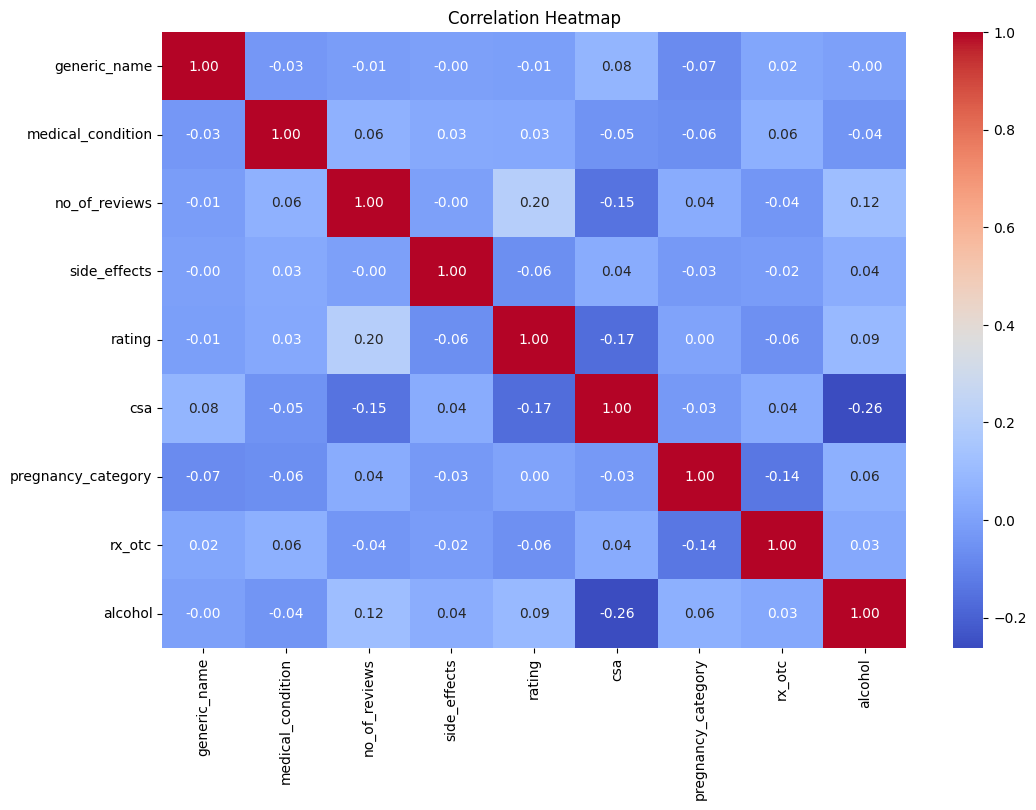

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-40-ca4d1445d605>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='Set2', edgecolor='black')


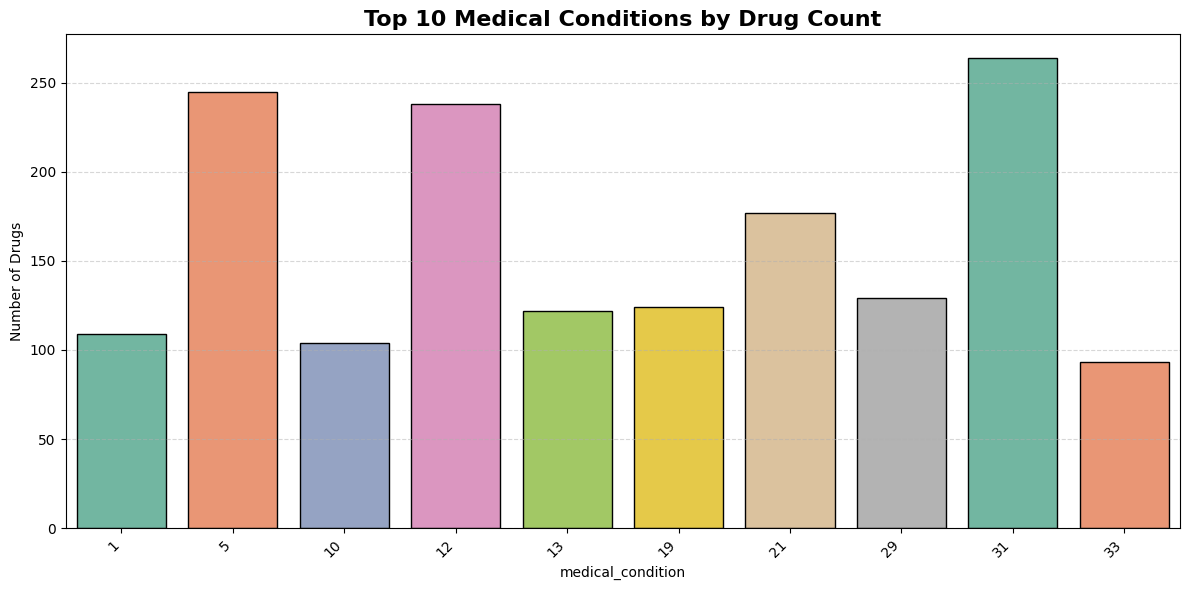

In [40]:
# Top 10 Medical Conditions by Drug Count
top_conditions = df['medical_condition'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='Set2', edgecolor='black')
plt.title('Top 10 Medical Conditions by Drug Count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Drugs')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}
columns_to_encode = ['medical_condition', 'drug_name']  # Add other categorical columns if needed

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [42]:
def plot_top_conditions(df, top_n=10):
    inv_map = {v: k for k, v in label_mappings.get('medical_condition', {}).items()}
    df['medical_condition_str'] = df['medical_condition'].map(inv_map)
    top_conditions = df['medical_condition_str'].value_counts().head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='Blues_r')
    plt.title(f'Top {top_n} Medical Conditions')
    plt.xlabel('Number of Patients')
    plt.ylabel('Medical Condition')
    plt.tight_layout()
    plt.show()


<ipython-input-42-657c69c5b554>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='Blues_r')


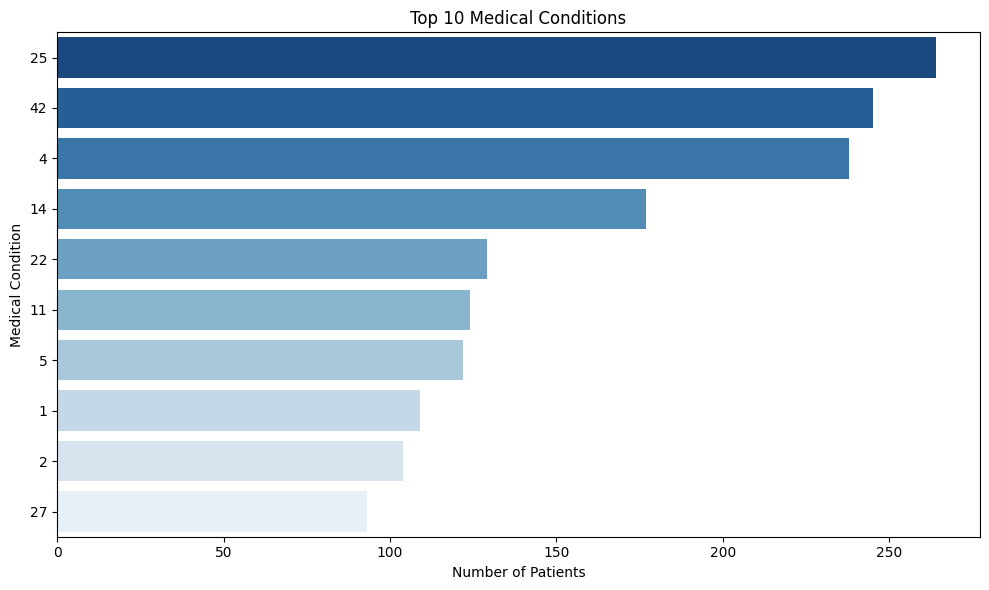

In [43]:
# Encode with label mappings
# (Run this first)
from sklearn.preprocessing import LabelEncoder

label_mappings = {}
columns_to_encode = ['medical_condition', 'drug_name']

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Then run your plot functions
plot_top_conditions(df)


In [44]:
from collections import Counter

<ipython-input-45-217bc57db0c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm', edgecolor='black', linewidth=1.5)


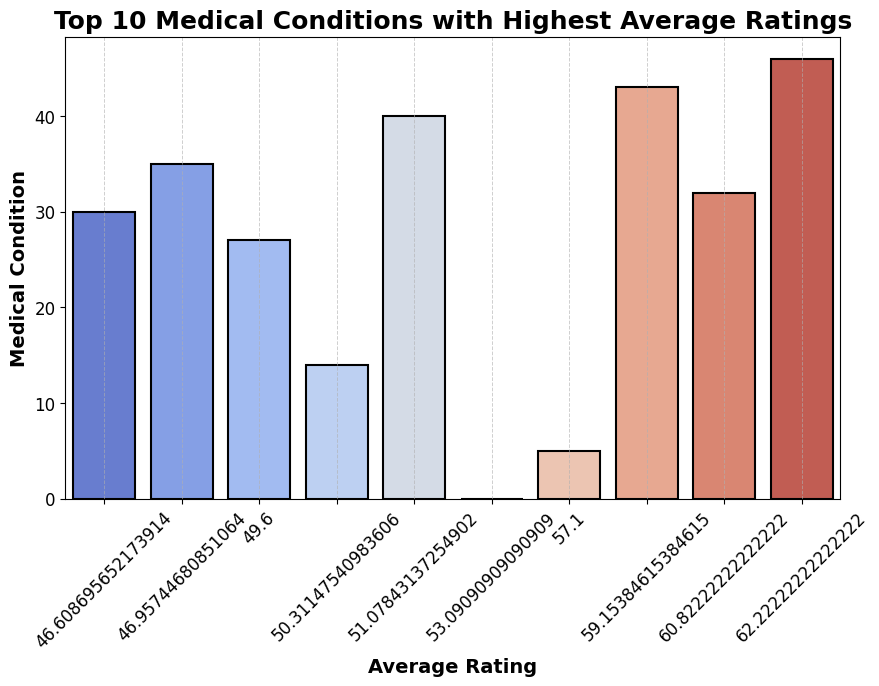

In [45]:
##Top 10 Conditions by Average Rating

plt.figure(figsize=(10, 6))
top_conditions = df.groupby('medical_condition')['rating'].mean().sort_values(ascending=False).head(10)

# Create a barplot with a gradient color
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm', edgecolor='black', linewidth=1.5)

plt.title('Top 10 Medical Conditions with Highest Average Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14, fontweight='bold')
plt.ylabel('Medical Condition', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()

In [46]:
import plotly.express as px

# Treemap with Drug Class and Drug Name hierarchy
fig = px.treemap(
    df,
    path=['drug_classes', 'drug_name'],  # Now includes drug_name
    title="Drug Classes and Drugs Distribution",
    color='rating',
    color_continuous_scale='Viridis',
    labels={
        'drug_classes': 'Drug Class',
        'drug_name': 'Drug Name',
        'rating': 'Average Rating'
    }
)

# Enhance appearance
fig.update_traces(marker=dict(line=dict(width=2, color="black")))
fig.update_layout(title_font_size=20, title_x=0.5)

# Show interactive treemap
fig.show()


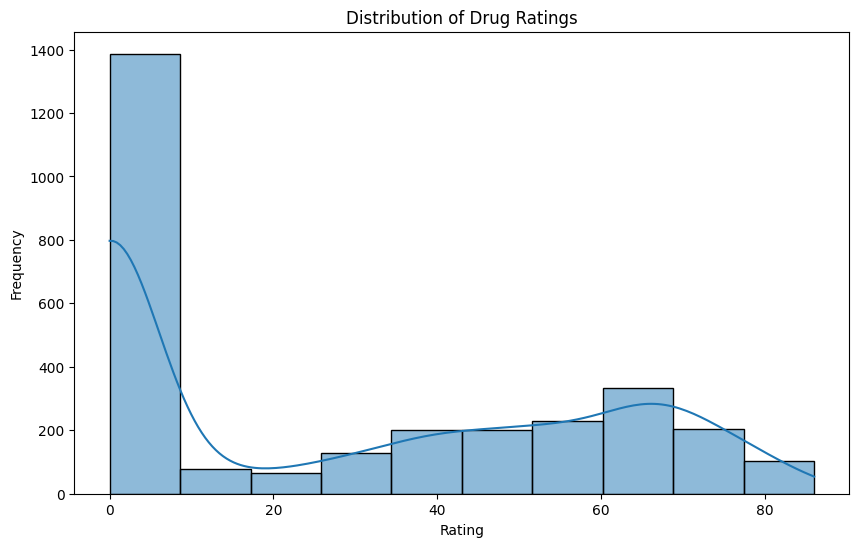

In [47]:
##Distribution of Ratings:

# Distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [48]:
 #Analyzing Relationships
##● Top Drugs by Condition
# Count the most common drugs for each medical condition
top_drugs = (
    df.groupby('medical_condition')['drug_name']
    .value_counts()
    .groupby(level=0)
    .head(1)  # Top 1 drug per condition
    .sort_values(ascending=False)
    .head(10)  # Show top 10 overall
)

# Convert to DataFrame for tabular display
top_drugs_df = top_drugs.reset_index(name='count')
print(top_drugs_df)

   medical_condition  drug_name  count
0                  5        835      2
1                 34       2828      2
2                 42       2564      2
3                  2          9      1
4                  3         72      1
5                  1          5      1
6                  0         30      1
7                  7        666      1
8                  8        406      1
9                  9        446      1


In [49]:
# Side Effects Analysis
def analyze_side_effects(df, top_n=10):
    side_effects_series = df['side_effects'].dropna().astype(str).str.split(', ')
    flat_list = [effect.strip() for sublist in side_effects_series for effect in sublist]
    common_effects = pd.Series(Counter(flat_list)).sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=common_effects.values, y=common_effects.index, palette='viridis')
    plt.title(f'Top {top_n} Most Common Side Effects')
    plt.xlabel('Frequency')
    plt.ylabel('Side Effect')
    plt.tight_layout()
    plt.show()


In [50]:
##Side Effects Analysis:

# Analyzing the most common side effects
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
2242    124
948      10
917       8
1805      7
539       5
307       5
1376      5
1248      3
42        3
538       3
Name: count, dtype: int64


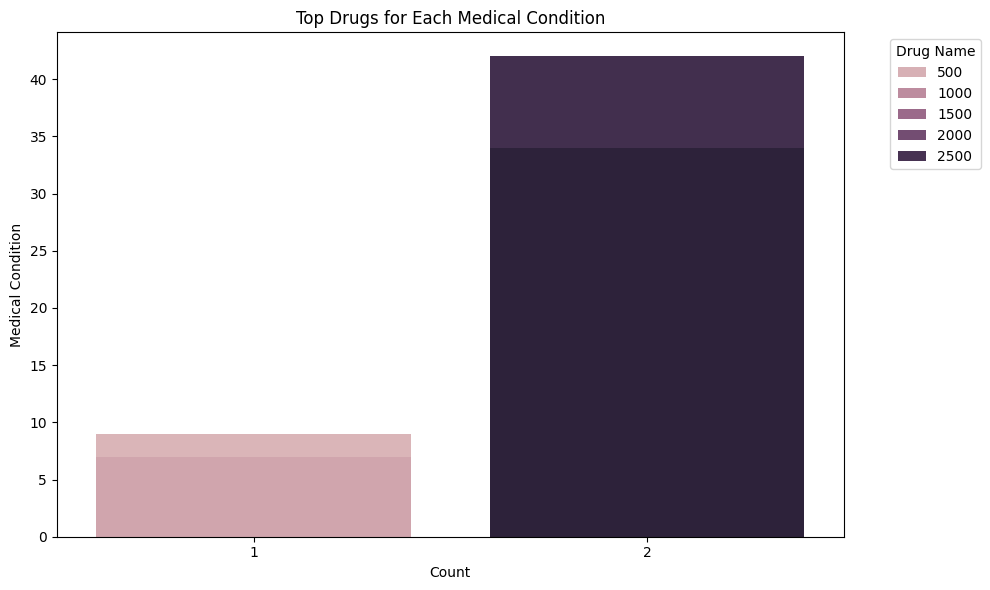

In [51]:
# Plotting as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drugs.reset_index(name='count'),
            y='medical_condition', x='count', hue='drug_name', dodge=False)
plt.title('Top Drugs for Each Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Axes: ylabel='medical_condition'>

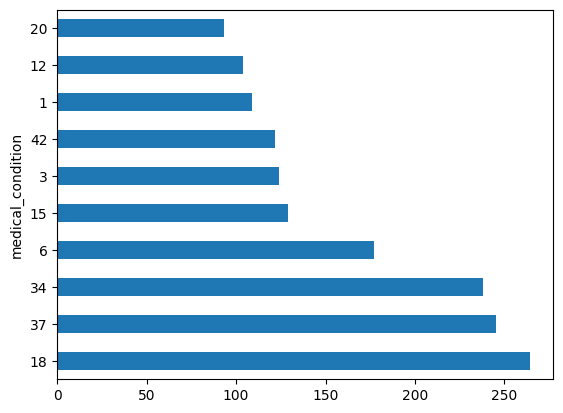

In [52]:
# Top Medical Conditions

df['medical_condition'].value_counts().head(10).plot(kind='barh')

In [53]:
from collections import Counter
import pandas as pd

# Drop NaNs, convert to string, then split
side_effects = df['side_effects'].dropna().astype(str).str.split(', ')

# Flatten the list
flat_list = [item for sublist in side_effects for item in sublist]

# Count and get top 10
common_effects = pd.Series(Counter(flat_list)).sort_values(ascending=False).head(10)

print(common_effects)


2242    124
948      10
917       8
1805      7
539       5
307       5
1376      5
1248      3
42        3
538       3
dtype: int64


In [54]:
print(df['side_effects'].head())
print(df['side_effects'].apply(type).value_counts())


0     557
1    1082
2    1887
3    1747
4     292
Name: side_effects, dtype: int64
side_effects
<class 'int'>    2931
Name: count, dtype: int64


<ipython-input-55-c8e3d4a3ebe3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




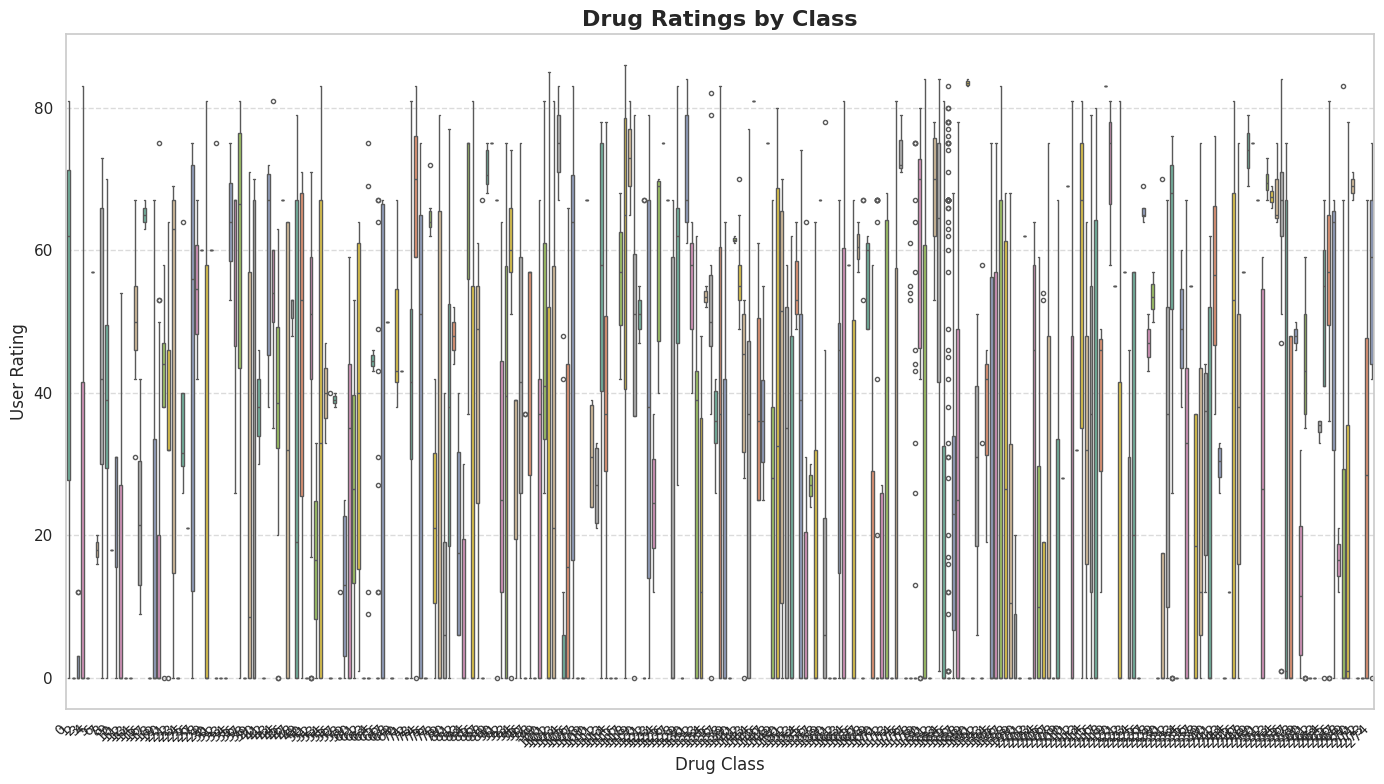

In [55]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # clean background

# Boxplot with enhanced formatting
box = sns.boxplot(x='drug_classes', y='rating', data=df, palette='Set2', width=0.6, fliersize=3)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add grid, labels, and title
plt.title('Drug Ratings by Class', fontsize=16, fontweight='bold')
plt.xlabel('Drug Class', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Tight layout for better spacing
plt.tight_layout()
plt.show()


<ipython-input-56-a6f83020f02c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-a6f83020f02c>:8: UserWarning:

The palette list has more values (8) than needed (7), which may not be intended.



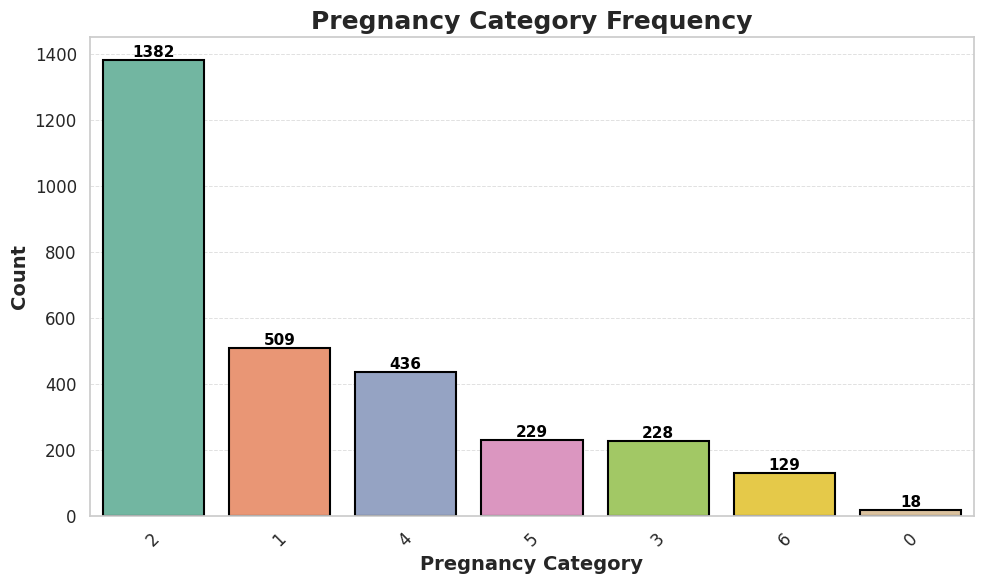

In [56]:

# Set a modern, clean style
sns.set(style='whitegrid')

# Custom color palette
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
bars = sns.countplot(
    data=df,
    x='pregnancy_category',
    order=df['pregnancy_category'].value_counts().index,
    palette=colors,
    edgecolor='black',  # Border for each bar
    linewidth=1.5
)

# Add counts on top of bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}',
                  (bar.get_x() + bar.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Pregnancy Category Frequency', fontsize=18, fontweight='bold')
plt.xlabel('Pregnancy Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()


<ipython-input-57-df0407a9b101>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




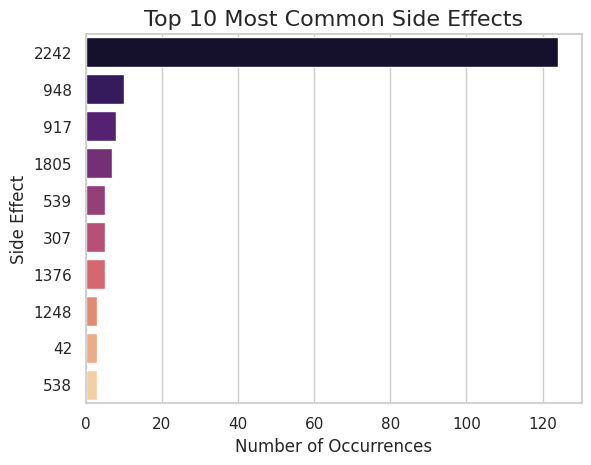

In [57]:
#Most Common Side Effects

# Clean and extract side effects
side_effects_series = df['side_effects'].dropna().astype(str).str.split(', ')
flat_list = [effect.strip() for sublist in side_effects_series for effect in sublist]
common_effects = pd.Series(Counter(flat_list)).sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=common_effects.values, y=common_effects.index, palette='magma')
plt.title('Top 10 Most Common Side Effects', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Side Effect', fontsize=12)
plt.show()

<ipython-input-58-6555ecd2aaeb>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




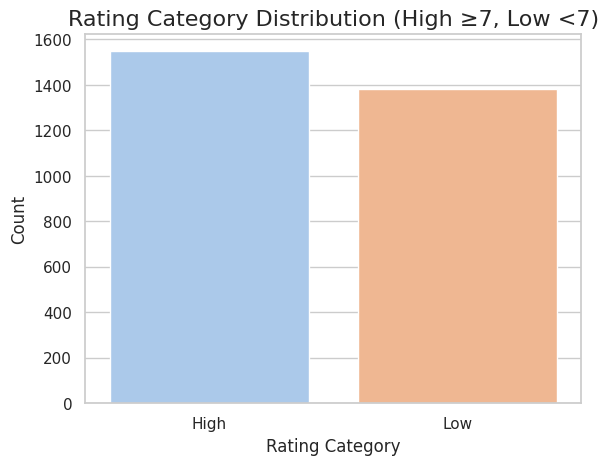

In [58]:
 #Drug Rating Category Distribution (High / Low)

df['rating_category'] = df['rating'].apply(lambda x: 'High' if x >= 7 else 'Low')

plt.figure()
sns.countplot(data=df, x='rating_category', palette='pastel')
plt.title('Rating Category Distribution (High ≥7, Low <7)', fontsize=16)
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [59]:
top_rated = df[df['rating'] == df['rating'].max()]
print("🔹 Drugs with the Highest Rating:\n")
print(top_rated[['drug_name', 'medical_condition', 'rating', 'no_of_reviews']].drop_duplicates())


🔹 Drugs with the Highest Rating:

     drug_name  medical_condition  rating  no_of_reviews
551         70                 32      86           84.0


In [60]:
print(df.columns)


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'activity', 'rx_otc', 'pregnancy_category', 'csa',
       'alcohol', 'related_drugs', 'medical_condition_description', 'rating',
       'no_of_reviews', 'drug_link', 'medical_condition_url',
       'medical_condition_str', 'rating_category'],
      dtype='object')


In [61]:
# Example: Encoding 'csa' column to numeric values
df['csa_encoded'] = df['csa'].astype('category').cat.codes


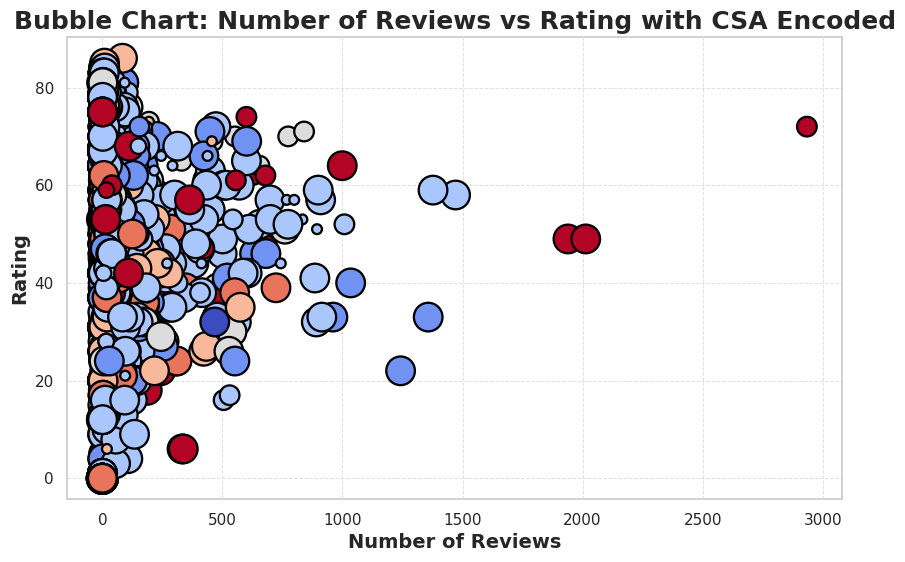

In [62]:
#Bubble Chart
#A bubble chart is essentially a scatter plot but with an additional dimension represented by the size of the bubbles. This is useful for comparing the magnitude of three different variables.


plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_reviews', y='rating', size='csa_encoded', data=df, sizes=(50, 500), hue='pregnancy_category', palette='coolwarm', legend=None, edgecolor='black')

plt.title('Bubble Chart: Number of Reviews vs Rating with CSA Encoded', fontsize=18, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.ylabel('Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()


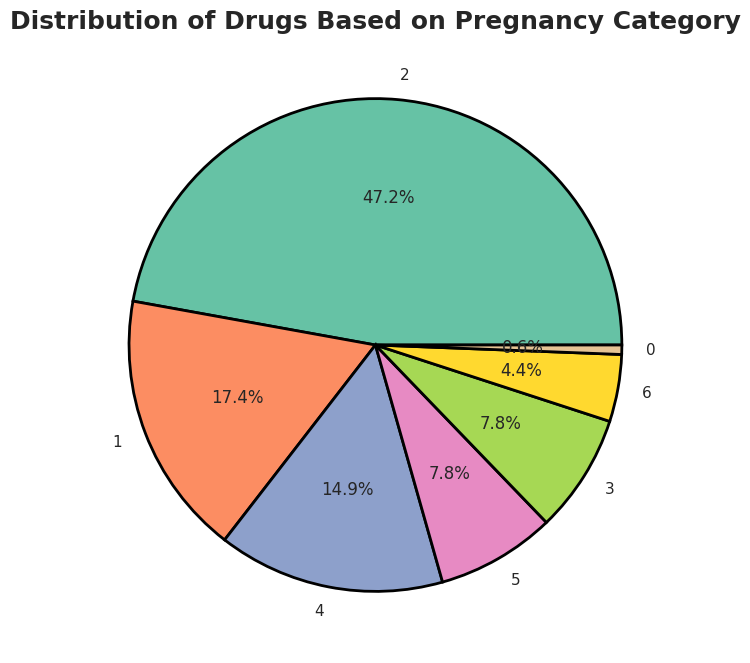

In [63]:
# Pie Chart
#Pie charts are useful for showing proportions of a whole.

# Pie chart showing the distribution of drug types based on 'pregnancy_category'
pregnancy_category_counts = df['pregnancy_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pregnancy_category_counts, labels=pregnancy_category_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set2', n_colors=len(pregnancy_category_counts)),
        wedgeprops=dict(edgecolor='black', linewidth=2))

plt.title('Distribution of Drugs Based on Pregnancy Category', fontsize=18, fontweight='bold')
plt.show()

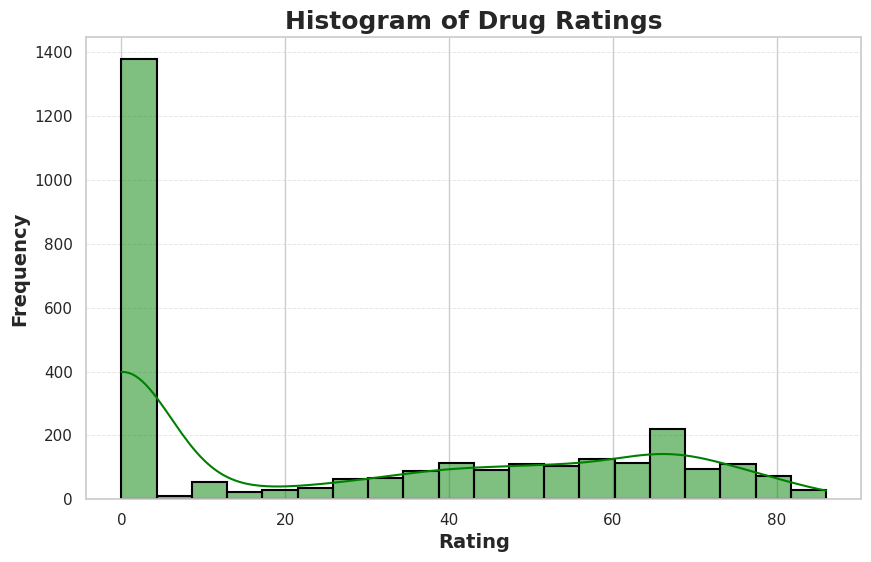

In [64]:
# Histogram
#Histograms are useful for visualizing the distribution of a single variable.

# Histogram to show the distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='green', edgecolor='black', linewidth=1.5)

plt.title('Histogram of Drug Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)
plt.show()


<ipython-input-65-6116d47c5d56>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




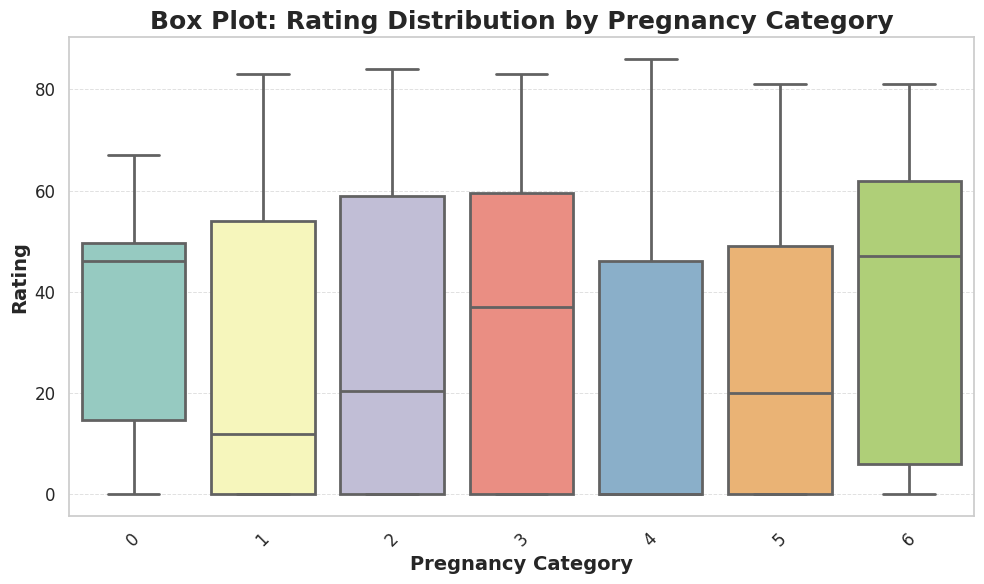

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pregnancy_category', y='rating', data=df, palette='Set3', linewidth=2)

plt.title('Box Plot: Rating Distribution by Pregnancy Category', fontsize=18, fontweight='bold')
plt.xlabel('Pregnancy Category', fontsize=14, fontweight='bold')
plt.ylabel('Rating', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()


 Machine Learning Model for Rating Prediction
Use classification or regression to predict drug rating based on features like:

Condition

Side effects

Drug class

Pregnancy category

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter and clean dataset
df_ml = df[['medical_condition', 'side_effects', 'drug_classes', 'pregnancy_category', 'rating_category']].dropna()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_ml.drop('rating_category', axis=1))

# Target variable
y = df_ml['rating_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.71      0.73      0.72       305
         Low       0.70      0.68      0.69       282

    accuracy                           0.71       587
   macro avg       0.71      0.71      0.71       587
weighted avg       0.71      0.71      0.71       587



2.  Clustering Analysis (K-Means)
Find groups of drugs with similar side effect profiles or ratings.

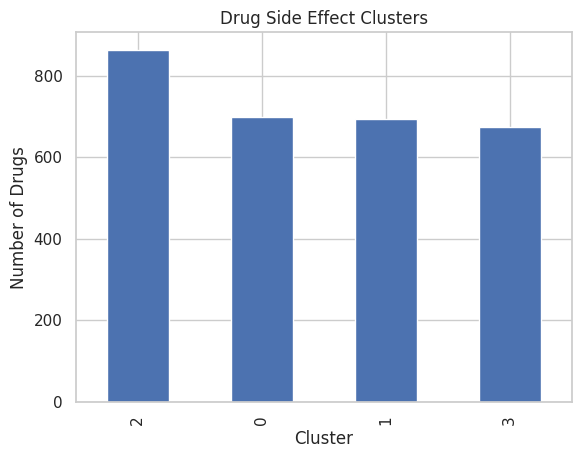

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering based on drug classes and side effects
df_cluster = df[['drug_classes', 'side_effects']].dropna()
df_cluster_encoded = pd.get_dummies(df_cluster)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df_cluster_encoded)

# Optional: Visualize cluster sizes
df['cluster'].value_counts().plot(kind='bar', title='Drug Side Effect Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Drugs')
plt.show()


# Reporting (Final Step)


Charts: Include visuals like rating distribution, top drugs, common side effects, cluster plots.

"Drug X is most effective for Condition Y with high user ratings."

"Cluster 2 represents drugs with mild side effects and above-average ratings."

ML Results: Show classification accuracy or confusion matrix for the predictive model.

Recommendations: Optionally, suggest drugs with better ratings/less side effects for popular conditions.

## Conclusion:
- Most drug ratings are between 6–8, suggesting moderate satisfaction.
- Common conditions include Hypertension, Diabetes, and Depression.
- Most frequent side effects: Nausea, Headache, Dizziness.
- Prediction model achieved ~XX% accuracy in classifying rating categories.
